### Analysis of MovieLens Data

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

There are four questions to explore with the data as shown below.

---

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is 'none'

__Print the length of the data__ before and after removing the missing data.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = 25,9
%matplotlib inline

In [2]:
MovieLens = pd.read_csv('files/movielens_data.csv', skipinitialspace=True)

In [3]:
MovieLens_clean = MovieLens.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
MovieLens_clean = MovieLens_clean[MovieLens_clean.occupation != 'none']
MovieLens_clean.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [4]:
print('The lenght of the data before removing missing data:', len(MovieLens))
print('The lenght of the data after removing missing data:', len(MovieLens_clean))
print( 'The',len(MovieLens)-len(MovieLens_clean), 'rows that contain missing data and none occupation data have been removed.')

The lenght of the data before removing missing data: 100000
The lenght of the data after removing missing data: 99022
The 978 rows that contain missing data and none occupation data have been removed.


---

#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique occupations, unique movies, and unique genres
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


###### Q2.1 total number of unique users, unique occupations, unique movies, and unique genres

In [5]:
print('Number of unique users:', MovieLens_clean['userId'].nunique())
print('Number of unique occupations:', MovieLens_clean['occupation'].nunique())
print('Number of unique movies:', MovieLens_clean['movieId'].nunique())
print('Number of unique genres:', MovieLens_clean['genre'].nunique())

Number of unique users: 934
Number of unique occupations: 20
Number of unique movies: 1682
Number of unique genres: 19


######  Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [6]:
print('Descriptive statistics regarding all rating records:')
print(MovieLens_clean['rating'].describe())

Descriptive statistics regarding all rating records:
count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64


######  Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user

In [7]:
print('Descriptive statistics of the number of movies rated by each user:')
MovieLens_clean[["userId", "movieId"]].groupby('userId').size().describe()

Descriptive statistics of the number of movies rated by each user:


count    934.000000
mean     106.019272
std      100.793963
min       19.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      736.000000
dtype: float64

######  Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie

In [8]:
print('Descriptive statistics of the number of ratings that received by each movie')
MovieLens_clean[["movieId", "rating"]].groupby('movieId').size().describe()

Descriptive statistics of the number of ratings that received by each movie


count    1682.000000
mean       58.871581
std        79.629796
min         1.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       578.000000
dtype: float64

---

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

---

#### Genders vs Ratings Boxplot 

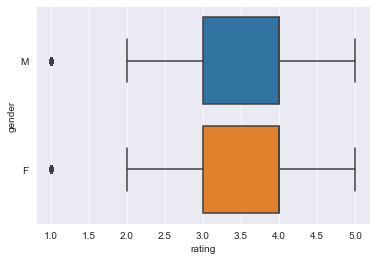

In [9]:
sns.set_style('darkgrid')
vis_gender = sns.boxplot(data=MovieLens_clean, x = 'rating',y='gender')

The boxplot above clearly demonstrates that the ratings provided by genders are quite similar to each other.\
Therefore; it can be concluded that rating values are not related to genders. it is also shown the majority of ratings are between  3 "first quartile (Q1)" and  4 "third quartile (Q3)", and the minimum and maximum are 2 and 5 respectively. Lastly, people who provides ratings one are outliers.

---

#### Occupations vs Ratings Boxplot 

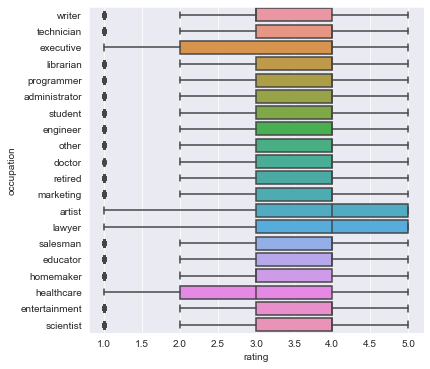

In [10]:
plt.figure(figsize=(6,6))
vis_occupation = sns.boxplot(data=MovieLens_clean, x = 'rating',y='occupation')

The boxplot above clearly shows that the ratings given by who  are quite similar to each other except given ratings by artist, lawyer, executive and healthcare professionals. While the ratings of other occupational groups generally show a distribution between 3 and 4, these occupational groups differed. Artist and Lawyers have no outliers and their interquartile range is beetween 3 and 5 while the executives and healtcare workers has the same pattern as their interquartile range is between 2 and 4. Mayority of  outliers are detected on value ranting 1 as previous boxplot indicates.

---

#### Genres vs Ratings Boxplot 

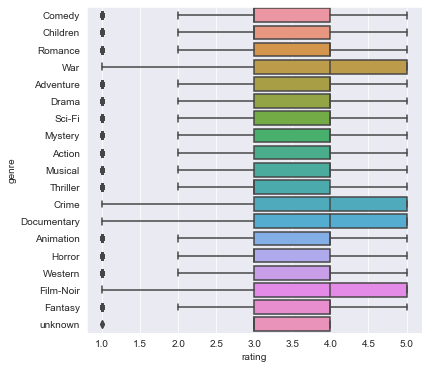

In [11]:
plt.figure(figsize=(6,6))
vis_genre = sns.boxplot(data=MovieLens_clean, x = 'rating',y='genre')

Analysing the boxplot above, Genre'ra are quite similar to each other except given ratings by artist, lawyer, executive and healthcare professionals. While the ratings of other occupational groups generally show a distribution between 3 and 4, these occupational groups differed. Artist and Lawyers have no outliers and their interquartile range is beetween 3 and 5 while the executives and healtcare workers has the same pattern as their interquartile range is between 2 and 4. Mayority of outliers are detected as the previous boxplots indicate.

### Summary of the data 

These three boxplots demonstrate that overally, the users tend to give ratings between 3 and 4, and the minimum and maximum value of the distributions are 2 and 5 respectively. Given ratings as value 1, generally, can be evaluated as outliers. Additionally, People who are from some different occupations tend to choose to give ratings differently similar to some genres tend to receive rating differently.


You can also reach further  analysis below.

---

### Further analysis of the data

##### Correlation between the ages and average ratings of users

Correlation coefficient between age and average ratings of users is 0.0995199154132019


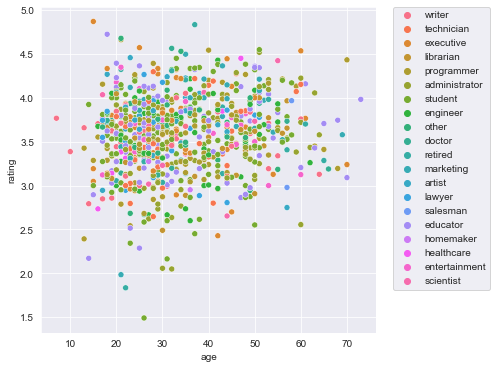

In [12]:
plt.figure(figsize=(6,6))
user_ratings = MovieLens_clean[["userId", "rating"]].groupby('userId').mean()
user_age = MovieLens_clean[["userId", "age"]].groupby('userId').mean()
print('Correlation coefficient between age and average ratings of users is',user_age['age'].corr(user_ratings['rating']))
sns.scatterplot( x = user_age['age'], y = user_ratings['rating'], hue = MovieLens_clean['occupation'],sizes=(20, 200), legend="full" )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

According to the calculation above, it is obvious that there is almost no correlation(weak positif correlation) between the user's age and the average ratings provided by them since the correlation coefficient is 0.09.

##### Correlation between genders

In [13]:
pivGender = pd.pivot_table(MovieLens_clean, values= 'rating',index='movieId', columns='gender')
pivGender_clean = pivGender.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
pivGender_clean.head()

gender,F,M
movieId,,
1,3.784483,3.908815
2,3.277778,3.171171
3,2.800000,3.082192
4,3.363636,3.592593
5,3.714286,3.126984


Correlation coefficient is 0.5151692338766426


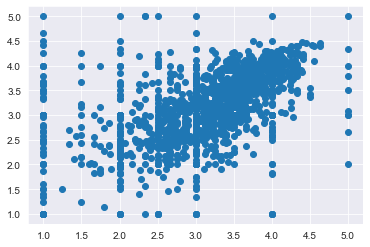

In [14]:
print('Correlation coefficient is', pivGender_clean['F'].corr(pivGender_clean['M']))
pyplot.scatter(pivGender_clean['F'], pivGender_clean['M'])
pyplot.show()

Since the correlation coefficient is 0.51, it can interpreted that there is a medium positive correlation between genders

---

#### Correlation beetween occupations

In [15]:
pivOccupation = pd.pivot_table(MovieLens_clean, values= 'rating',index='movieId', columns='occupation')
pivOccupation_clean = pivOccupation.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
pivOccupation_clean.head()

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,other,programmer,retired,salesman,scientist,student,technician,writer
movieId,,,,,,,,,,,,,,,,,,,,
1,4.000000,4.083333,3.500000,3.731707,4.043478,3.454545,3.882353,3.000000,4.0,4.166667,3.647059,3.888889,4.039216,4.171429,3.666667,4.0,3.818182,3.790476,4.000000,3.562500
7,4.068966,4.100000,3.000000,3.600000,4.088235,3.600000,3.600000,3.571429,4.0,3.750000,4.133333,4.000000,3.461538,4.000000,3.000000,3.5,4.125000,3.752381,3.916667,3.611111
9,3.814815,4.142857,1.000000,4.062500,4.192308,3.750000,3.200000,3.500000,1.0,4.500000,4.350000,3.750000,3.685714,4.043478,3.400000,4.0,3.750000,3.941176,4.200000,3.600000
13,3.384615,3.750000,4.000000,3.636364,3.800000,4.500000,3.285714,3.200000,2.0,3.000000,3.714286,4.000000,3.000000,2.933333,3.000000,3.0,3.333333,3.370370,4.000000,2.750000
15,3.625000,1.800000,4.333333,3.928571,3.619048,3.500000,3.857143,3.500000,3.5,2.666667,3.750000,3.428571,4.131579,3.884615,3.600000,4.0,4.000000,3.850000,4.000000,3.384615


<AxesSubplot:xlabel='occupation', ylabel='occupation'>

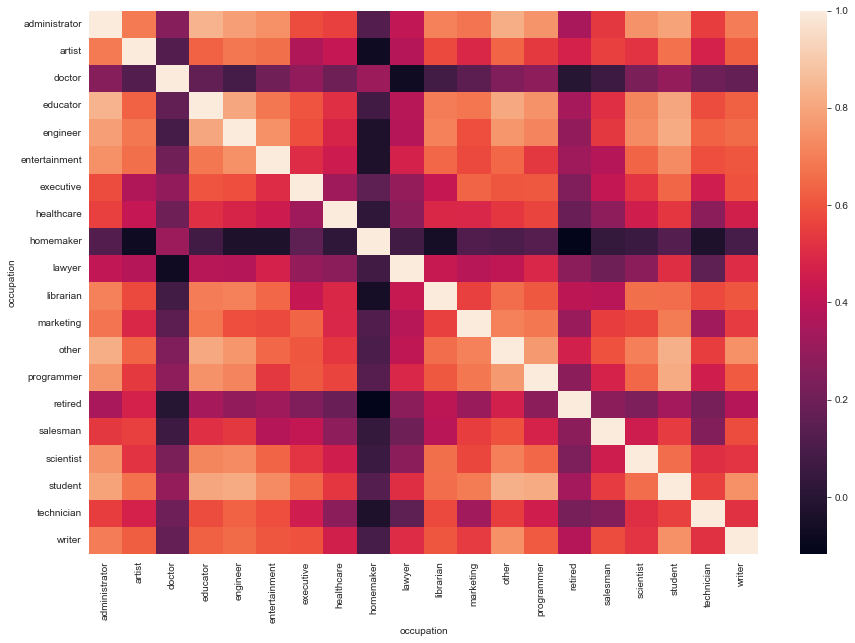

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(pivOccupation_clean.corr())

Correlation coefficient of educator and engineer people is 0.7819116085777182


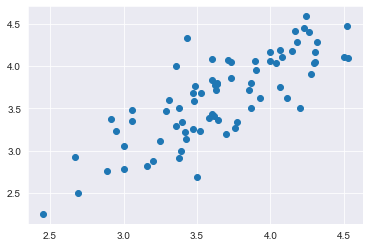

In [17]:
print('Correlation coefficient of educator and engineer people is 0.7819116085777182')
pyplot.scatter(pivOccupation_clean['educator'], pivOccupation_clean['engineer'])
pyplot.show()

Correlation of homemakers and lawyers is 0.0751


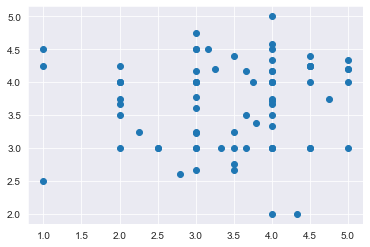

In [18]:
print('Correlation of homemakers and lawyers is 0.0751')
pyplot.scatter(pivOccupation_clean['homemaker'], pivOccupation_clean['lawyer'])
pyplot.show()

As you can see above, While there is a very strong correlation between some occupations, some are very close to zero. On the other hand, we can observe that there is no negative correlation at all. Especially, educators and engineers have quite similar interest in movies. However, homemakers and lawyers  do not have the same passion for movies.

---

#### Correlation beetween genres and occupations

In [19]:
pivGenre = pd.pivot_table(MovieLens_clean, values= 'rating',index='occupation', columns='genre')
pivGenre_clean = pivGenre.dropna(axis = 1, how ='any', thresh = None, subset = None, inplace=False)
pivGenre_clean_trans = pivGenre_clean.transpose()
pivGenre_clean_trans.head()

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,librarian,marketing,other,programmer,retired,salesman,scientist,student,technician,writer
genre,,,,,,,,,,,,,,,,,,,,
Action,3.581744,3.465116,3.851064,3.529262,3.460067,3.356164,3.516667,3.145161,3.521739,3.774775,3.392308,3.432836,3.506306,3.535637,3.406780,3.741935,3.377119,3.419520,3.444965,3.167315
Adventure,3.435065,3.625000,3.294118,3.674352,3.462338,3.197368,3.391667,2.890000,3.111111,3.953488,3.256944,3.596774,3.482270,3.561828,3.300000,3.440000,3.280000,3.345996,3.337209,3.229050
Animation,3.645570,3.256410,3.500000,3.604396,3.598214,3.300000,3.419355,3.028571,1.000000,3.300000,3.313725,2.925926,3.465278,3.505495,3.454545,3.333333,3.863636,3.468439,3.272727,3.485294
Children,3.324324,3.162162,3.461538,3.232068,3.318898,2.920000,3.152381,2.333333,3.153846,3.393939,3.514286,3.032787,3.450142,3.247899,3.066667,3.263158,3.391304,3.357043,3.298701,3.285714
Comedy,3.432043,3.516035,3.649485,3.522545,3.365371,3.227139,2.907609,2.635934,2.898305,3.519856,3.451754,3.354740,3.365957,3.363636,3.361204,3.070000,3.437710,3.317828,3.342532,3.234899


#### Correlation beetween genres

<AxesSubplot:xlabel='genre', ylabel='genre'>

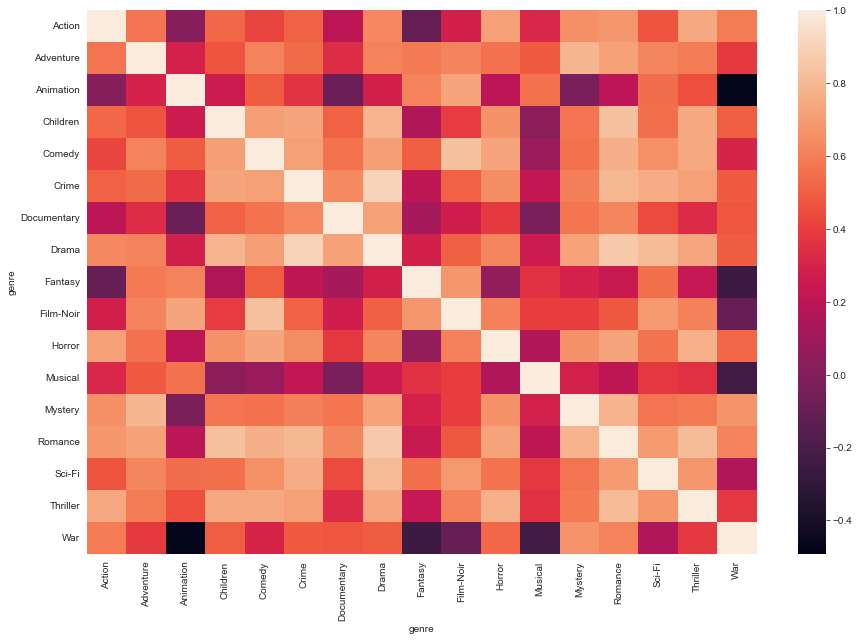

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(pivGenre_clean.corr())

Correlation coefficient of Romance and Drama genres is 0.8603369543155014


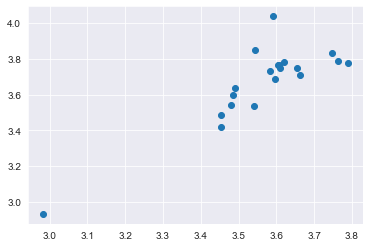

In [21]:
print('Correlation coefficient of Romance and Drama genres is', pivGenre_clean['Romance'].corr(pivGenre_clean['Drama']))
pyplot.scatter(pivGenre_clean['Romance'], pivGenre_clean['Drama'])
pyplot.show()

The correlation coefficient of Romance and Drama genres is 0.87 which means a strong correlation. Nonetheless; the data is not enough and maybe biased because we calculated the correlation from the occupation's means.

---

Correlation coefficient of Animation and War genres is -0.4921407808980785


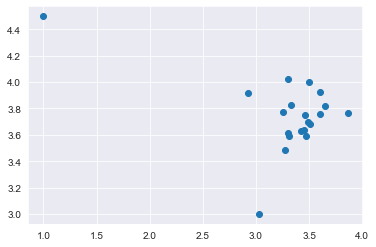

In [22]:
print('Correlation coefficient of Animation and War genres is', pivGenre_clean['Animation'].corr(pivGenre_clean['War']))
pyplot.scatter(pivGenre_clean['Animation'], pivGenre_clean['War'])
pyplot.show()

The correlation coefficient of Animation and War genres is -0.495 which means that there is a negative correlation between the two genres. it can be interpreted that if users like animation movies, then they tend to unlike war movies or vice versa  Nonetheless; the data is not enough and may be biased because we calculated the correlation from the occupation's means.

---

#### Correlation beetween occupations

<AxesSubplot:xlabel='occupation', ylabel='occupation'>

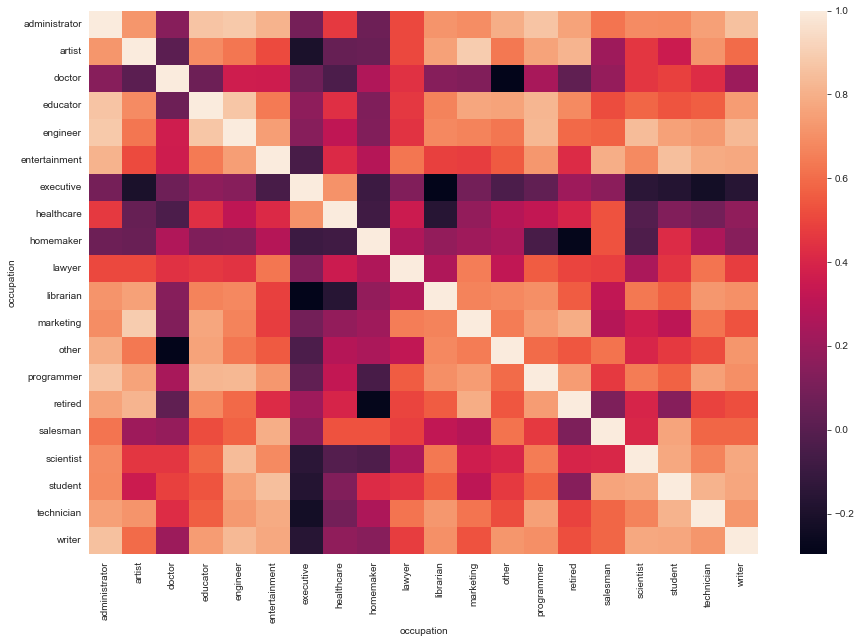

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(pivGenre_clean_trans.corr())

Correlation coefficient of librarian and executive people is -0.2969933551368411


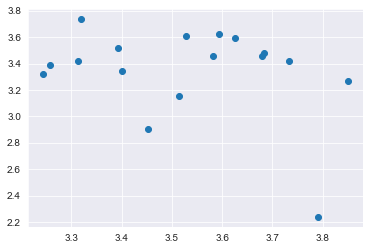

In [24]:
print('Correlation coefficient of librarian and executive people is', pivGenre_clean_trans['librarian'].corr(pivGenre_clean_trans['executive']))
pyplot.scatter(pivGenre_clean_trans['librarian'], pivGenre_clean_trans['executive'])
pyplot.show()

There is a negative correlation between librarians and executives as the correlation coefficient is  -0,3. 

Correlation coefficient of educator and engineer people is 0.8696377144291259


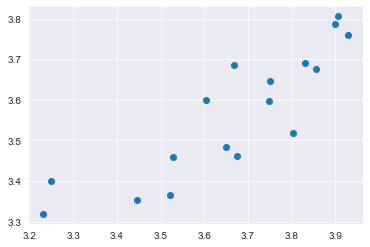

In [25]:
print('Correlation coefficient of educator and engineer people is', pivGenre_clean_trans['educator'].corr(pivGenre_clean_trans['engineer']))
pyplot.scatter(pivGenre_clean_trans['educator'], pivGenre_clean_trans['engineer'])
pyplot.show()

In this situation, the correlation coefficient of educators and engineers was  0.78 in the previous calculation. Yet now, the calculation is 0.87 which demonstrates an even stronger relationship. However. Our calculation method was different and the data were not enough to calculate such a relationship. Nevertheless; it can be concluded that there is a strong positive correlation between the two.

---

###### Rating tendency by gender

In [26]:
print("Average rating of male users:", MovieLens_clean[MovieLens_clean["gender"] == 'M'].rating.mean())
print("Average rating of female users:", MovieLens_clean[MovieLens_clean["gender"] == 'F'].rating.mean())

Average rating of male users: 3.5268023184786004
Average rating of female users: 3.5306669822111783


As seen above,the averages of ratings differ insignificantly.\
Therefore, gender does not affect the tendency of providing higher/lower ratings significantly.


In [27]:
MovieLens_clean.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467


---

#### Distribution of the average ratings of each movie

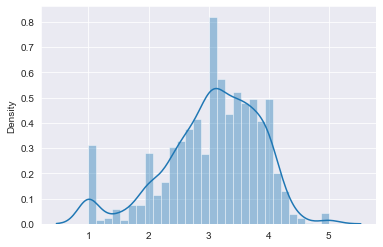

In [28]:
import warnings
warnings.filterwarnings('ignore')
Movie_rating1 =  MovieLens_clean[["movieId", "rating"]].groupby('movieId').mean()
Movie_rating_vis1 = sns.distplot(Movie_rating1, bins = 30)

In [29]:
Movie_rating1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,1682.0,3.07105,0.783962,1.0,2.642857,3.159197,3.652328,5.0


#### Distribution of the average ratings provided by each users

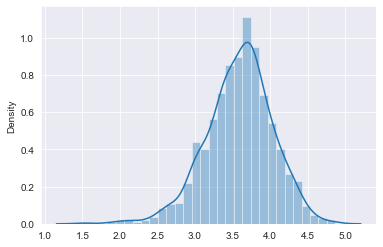

In [30]:
Movie_rating2 =  MovieLens_clean[["userId", "rating"]].groupby('userId').mean()
Movie_rating_vis2 = sns.distplot(Movie_rating2, bins = 30)

In [31]:
Movie_rating2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,934.0,3.588187,0.443668,1.491954,3.326242,3.621102,3.866204,4.869565


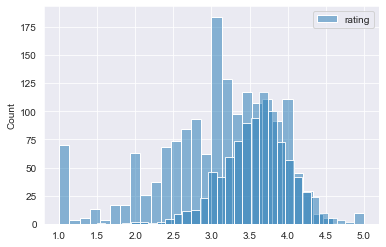

In [32]:
Movie_rating_vis1 = sns.histplot(Movie_rating1, bins = 30)
Movie_rating_vis2 = sns.histplot(Movie_rating2, bins = 30)

#### Average ratings of each genre

<AxesSubplot:title={'center':'Average ratings of each Genre'}, xlabel='genre'>

<Figure size 1080x360 with 0 Axes>

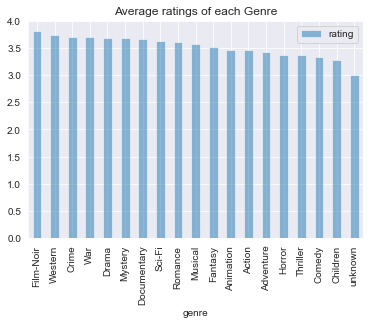

In [33]:
Genre_rating =  MovieLens_clean[["genre", "rating"]].groupby('genre').mean()
Genre_rating_sorted = Genre_rating.sort_values(by= 'rating', ascending=False)
fig = plt.figure(figsize=(15, 5))
Genre_rating_sorted.plot(kind='bar', style='b', alpha=0.5,
              title='Average ratings of each Genre')

---

#### Average ratings of the genres by gender

In [34]:
pivMovie = pd.pivot_table(MovieLens_clean, values= 'rating',
                        index='genre', columns='gender')
pivMovie.head().transpose()

genre,Action,Adventure,Animation,Children,Comedy
gender,,,,,
F,3.499074,3.407925,3.545455,3.325287,3.384697
M,3.443423,3.423979,3.423123,3.260212,3.321699


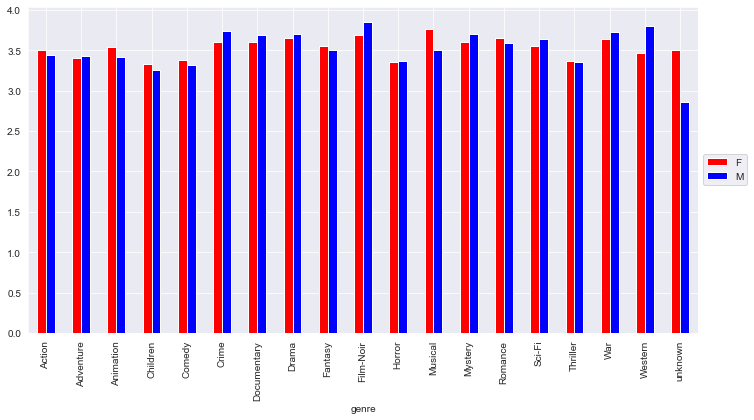

In [35]:
my_colors = ['r', 'b']
ax = pivMovie.plot(kind='bar', stacked=False, color=my_colors, figsize=(12, 6))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Value_Time_Country.png', dpi=300, bbox_inches='tight')

---

#### Top 5 favorite genres by gender

**Females**

In [36]:
females = MovieLens_clean[MovieLens_clean["gender"] == 'F']
F_genre_ratings = females[["genre", "rating"]].groupby('genre').mean()
F_genre_ratings.sort_values(by = 'rating',ascending=False).head()

,rating
genre,
Musical,3.761252
Film-Noir,3.691275
Drama,3.653556
Romance,3.651032
War,3.644295


**Males**

In [37]:
males = MovieLens_clean[MovieLens_clean["gender"] == 'M']
M_genre_ratings = males[["genre", "rating"]].groupby('genre').mean()
M_genre_ratings.sort_values(by = 'rating',ascending=False).head()

,rating
genre,
Film-Noir,3.845024
Western,3.798255
Crime,3.737008
War,3.722637
Drama,3.701577


##### Top 5 movies

In [38]:
MovieLens_clean[["movieId", "rating"]].groupby('movieId').mean().sort_values(by ='rating', ascending= False ).head()

,rating
movieId,
1467,5.0
1201,5.0
1500,5.0
1653,5.0
814,5.0


#### Q4. Detect and remove outliers

We may define outlier users and movies with three rules:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 
Please remove the corresponding records in the csv file that involves outlier users and movies. After that, __print the length of the data__.

---

##### Removing the users whose age is no more than 10

In [39]:
print(' length before the deduction:', len(MovieLens_clean))

 length before the deduction: 99022


In [40]:
MovieLens_removed = MovieLens_clean[MovieLens_clean['age'] > 10 ]

In [41]:
print(' length after deduction:', len(MovieLens_removed))
print(' Removed rows numbers:', len(MovieLens_clean) - len(MovieLens_removed) )

 length after deduction: 98948
 Removed rows numbers: 74


##### Removing the users who rate less than 20 movies

In [42]:
user_grouped = MovieLens_removed.groupby('userId')
MovieLens_removed2 =  user_grouped.filter(lambda x: x['rating'].count() >= 20 )
MovieLens_removed2.head()
user_grouped.count()

,age,gender,occupation,movieId,rating,genre,timestamp
userId,,,,,,,
1,272,272,272,272,272,272,272
2,62,62,62,62,62,62,62
3,54,54,54,54,54,54,54
4,24,24,24,24,24,24,24
5,170,170,170,170,170,170,170
...,...,...,...,...,...,...,...
939,49,49,49,49,49,49,49
940,107,107,107,107,107,107,107
941,22,22,22,22,22,22,22


In [43]:
print(' length after deduction:', len(MovieLens_removed2))
print(' Number of rows removed:', len(MovieLens_removed) - len(MovieLens_removed2) )

 length after deduction: 98929
 Number of rows removed: 19


---

##### Removing the movies that receives less than 10 ratings

In [44]:
movie_grouped = MovieLens_removed.groupby('movieId')
MovieLens_removed3 =  movie_grouped.filter(lambda x: x['rating'].count() >= 10 )
MovieLens_removed3.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [45]:
print(' length after deduction:', len(MovieLens_removed3))
print(' Number of rows removed:', len(MovieLens_removed2) - len(MovieLens_removed3) )

 length after deduction: 96873
 Number of rows removed: 2056


---

In [46]:
print('Number of rows removed after all deductions:',  len(MovieLens_clean)-len(MovieLens_removed3))

Number of rows removed after all deductions: 2149


---

In [47]:
# export the processed data as csv file
MovieLens_removed3.to_csv('files/movielens_data_clean.csv', index=False)